In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# HW3

Распределе́ние Фи́шера в теории вероятностей — это двухпараметрическое семейство абсолютно непрерывных распределений.

Пусть Y1, Y2 — две независимые случайные величины, имеющие распределение хи-квадрат: 
$$ {\displaystyle Y_{i}\sim \chi ^{2}(d_{i})},$$ где  $${ \displaystyle d_{i}\in \mathbb {N} ,\;i=1,2} d_{i}\in {\mathbb  {N}},\;i=1,2. $$ 
Тогда распределение случайной величины
$$ F={\frac  {Y_{1}/d_{1}}{Y_{2}/d_{2}}}, $$
называется распределением Фишера (распределением Снедекора) со степенями свободы d1, d2

## Генерирование выборки объема 1000 распределения Фишера

In [2]:
dfn, dfd = 15, 18 # параметры распределения
frv = sts.f(dfn, dfd)
gen_frv = frv.rvs(size=1000) # создание выборки

## Построение гистограммы и графика теоретической плотности

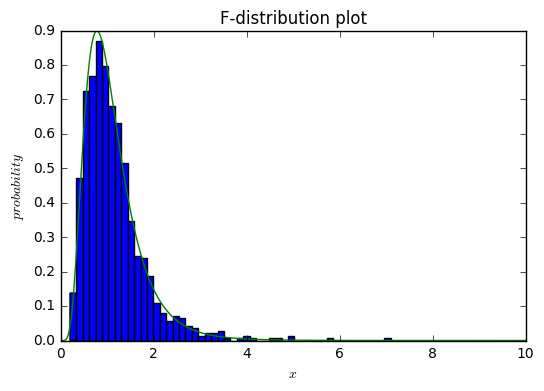

In [3]:
plt.hist(gen_frv, 50, normed=True)
rv = sts.f(dfn, dfd)
x = np.linspace(0.0001, 10, 500) # задание x

plt.plot(x, rv.pdf(x)) # описание графика
plt.title('F-distribution plot')
plt.ylabel('$probability$')
plt.xlabel('$x$');
plt.show()

## Оценка выборочного среднего

In [4]:
def calc_sample_mean(split_sizes, dfn, dfd, n_samples=1000):
    rv = sts.f(dfn, dfd)
    means_dict = {}
    
    for split_size in split_sizes:
        means_dict[split_size] = [] # создание словарей, содержащих средние значения для каждого объема выборки
        
        for x in range(0, n_samples):
            gen_rv = frv.rvs(size=split_size) # генерирование выборки размера split_size
            means_dict[split_size].append(gen_rv.mean()) # добавление нового значения в список
            
    return means_dict

In [5]:
def plot_sample_means(split_sizes, dfn, dfd, n_samples=1000):
    means_dict = calc_sample_mean(split_sizes, dfn, dfd)
    
    for split_size in means_dict.keys():
        plt.hist(means_dict[split_size], 25) # построение графика
        plt.ylabel('$number of samples$')
        plt.xlabel('$x$');
        plt.show()

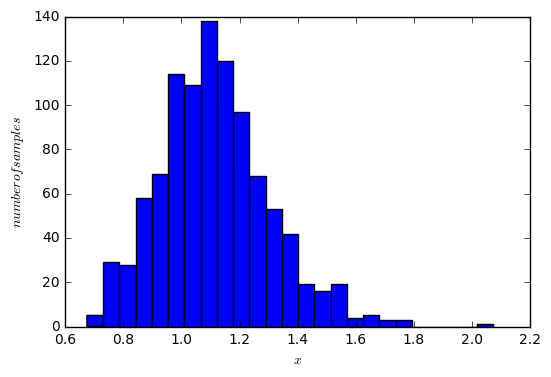

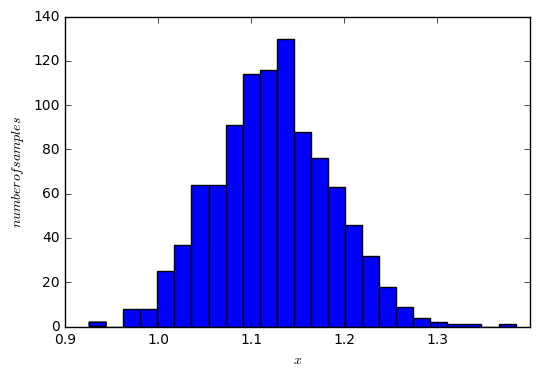

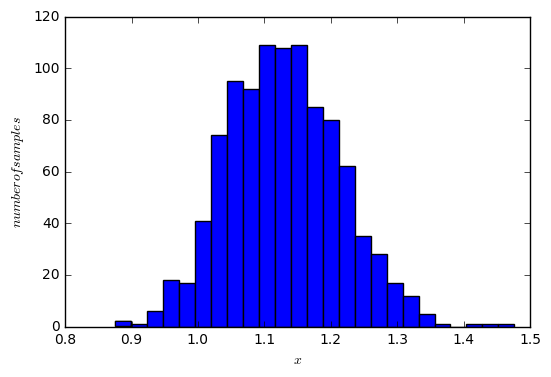

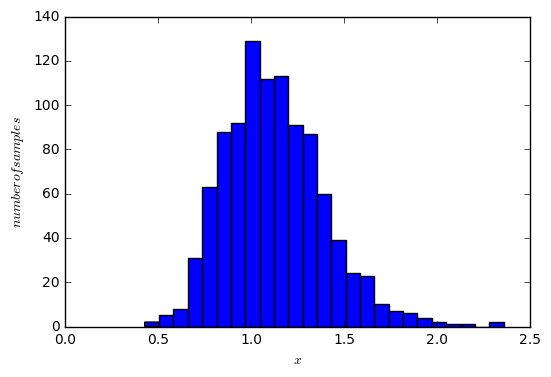

In [6]:
split_s = [5, 10, 50, 100] # задание объемов выборок для проверки =
means = calc_sample_mean(split_s, dfn, dfd)
plot_sample_means(means, split_s, dfn, dfd)

# ЦПТ

In [7]:
def calc_clt(means_dict, dfn, dfd):
    expected_value = sts.f.mean(dfn, dfd)
    std = sts.f.std(dfn, dfd)
    
    clt_dict = {}
    
    for split_size in means_dict.keys():
        clt_dict[split_size] = []
        
        for sample in means_dict[split_size]:
            val = (np.sqrt(split_size) * (sample - expected_value)) / std
            clt_dict[split_size].append(val)
            
    return clt_dict

In [8]:
def plot_clt(means_dict, dfn, dfd):
    clt_d = calc_clt(means_dict, dfn, dfd)
    
    for split_size in clt_d.keys():
        clt_d[split_size].sort()
        plt.hist(clt_d[split_size], 50, normed=True)
        pdf = sts.norm.pdf(clt_d[split_size])
        plt.plot(clt_d[split_size], pdf, alpha=0.5)
        plt.title('CLT. Sample size = {}'.format(split_size))
        plt.ylabel('$probability$')
        plt.xlabel('$x$');
        plt.show()

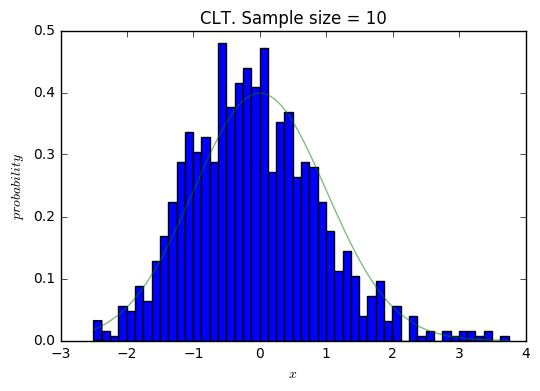

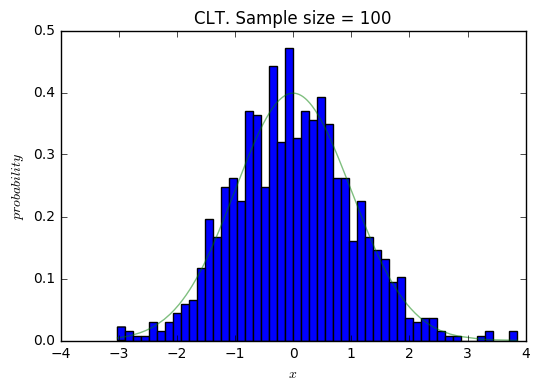

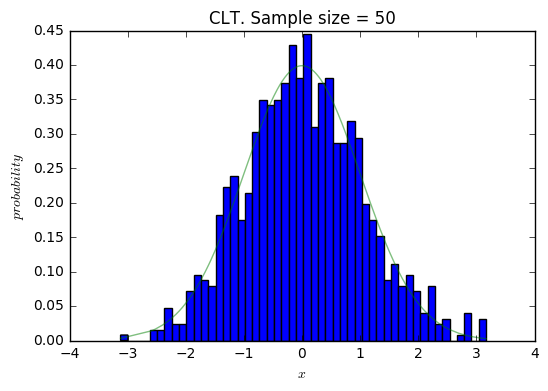

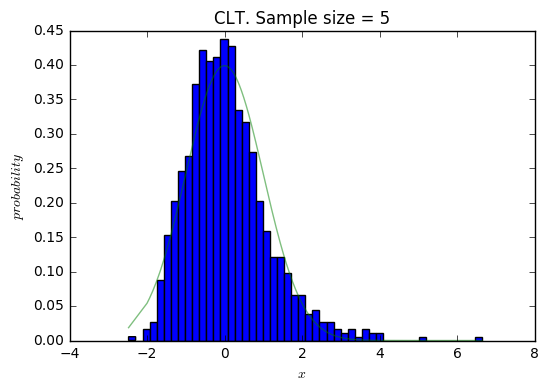

In [9]:
plot_clt(means, dfn, dfd)

Чем выше объем выборки, тем выше схожесть с теоретическими значениями нормального распределения. То есть, выше точность апроксимации.

# Выводы

В рамках выполнения HW3 мной было рассмотрено распределение Фишера, а также проверены теоретические и фактические значения распределения на гистограммах. Действительно, теоретические значения очень близки к фактическим. 

Затем, сгенерировав необходимые данные, была успешно проверена Центральная предельная теорема. На реальном примере мной был доказан тот факт, что отмасштабированные случайные величины действительно имеют распределение, близкое к нормальному. 